In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt


'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

,pastpm25,pm25
date,,
2021-03-01,NaN,54.0
2021-02-01,54.0,58.0
2021-02-02,58.0,82.0
2021-02-03,82.0,81.0
2021-02-04,81.0,71.0


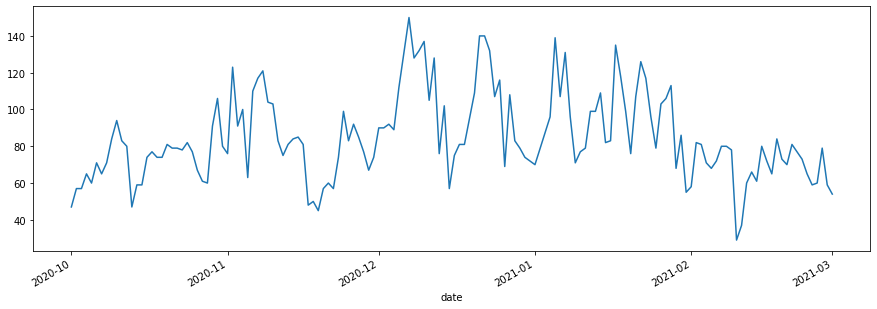

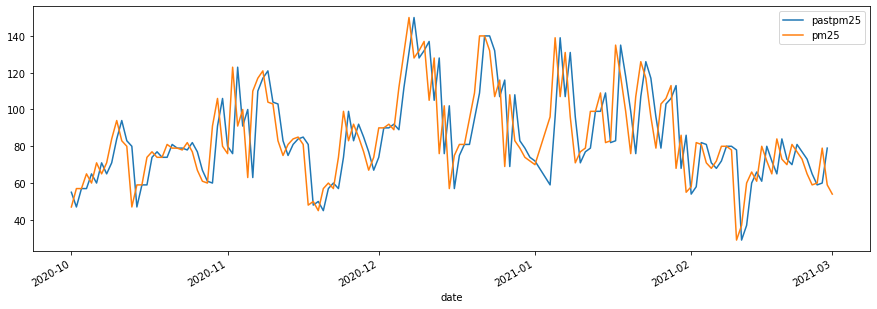

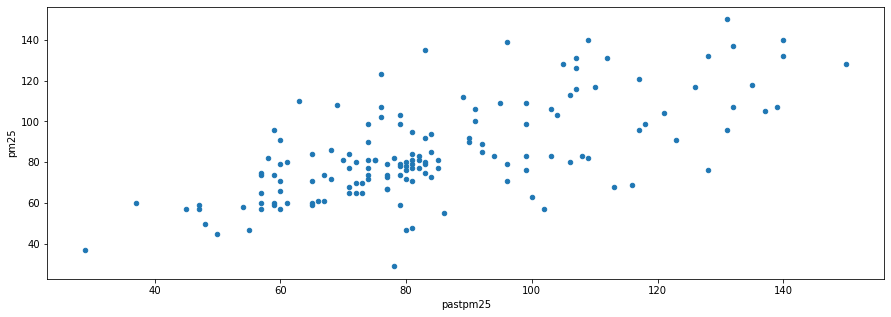

In [78]:
data = pd.read_csv("data\coloane,-macau-air-quality.csv",)
data.date=pd.to_datetime(data.date)
data.index=data.date

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
#data.pm25=data.pm25.astype(float)
data.pm25= pd.to_numeric(data.pm25, errors='coerce')

fig,axs=plt.subplots(figsize=(15,5))
data.pm25[:150].plot(ax=axs)

polluant='pm25'
pastpolluant = 'past'+polluant
df = data[:150].copy()
df[pastpolluant]=data[polluant].shift(1)
df[[pastpolluant,polluant]].head()

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

<AxesSubplot:xlabel='pastpm25', ylabel='pm25'>

0.4468704985016966

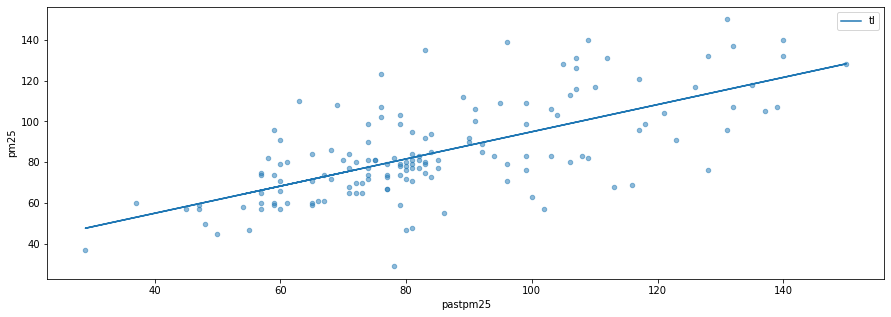

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

fig,axs= plt.subplots(figsize=(20,10))
regr = linear_model.LinearRegression()
X= df[[pastpolluant,polluant]].dropna(how='any')
X.plot(kind='scatter',ax=axs, x = pastpolluant, y =polluant, figsize=(15,5), alpha =0.5)
y = X.pop(polluant)
regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values.reshape(1,-1)[0])
trendln.plot(ax=axs)

regression.score(X, y)

In [2]:
l=[]
for i in range(10):
    data['pm25 shifted%i'%i]=datapm25.shift(i+1)
    l.append(np.corrcoef(data['shifted%i'%i]['AAPL'].iloc[-90:],data['Close']['AAPL'].iloc[-90:])[0][1])


[*********************100%***********************]  2 of 2 completed


<AxesSubplot:title={'center':'last 90 days correlation w.r.t days shifted'}, xlabel='nb days shifted'>

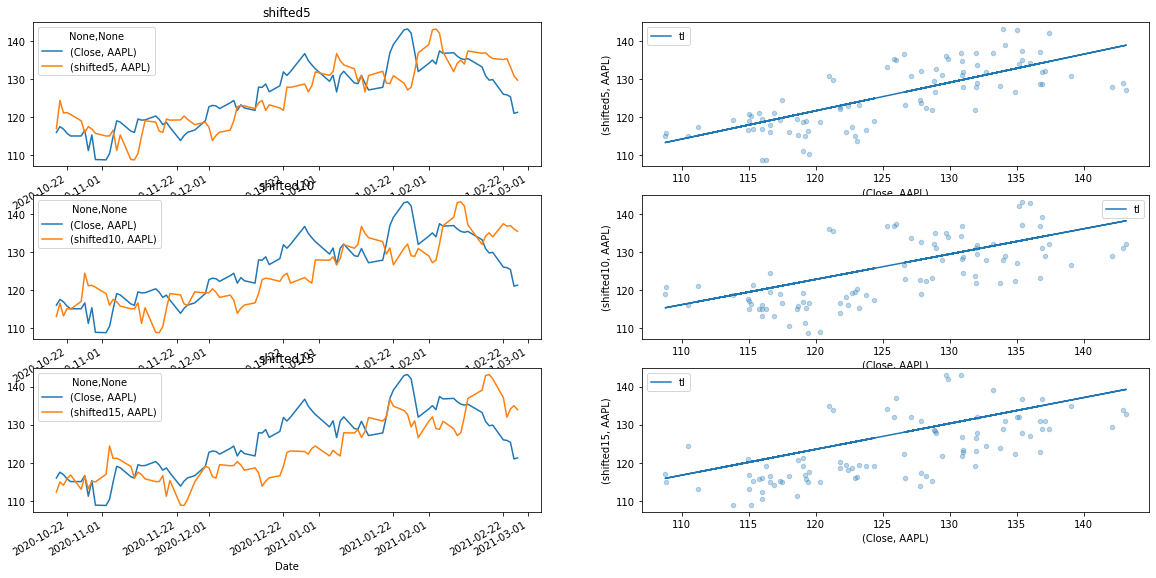

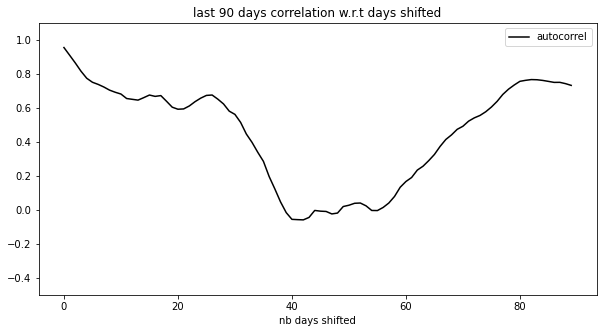

In [12]:
df= pd.DataFrame({'autocorrel':l})

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
shifts=[5,10,15]
fig,axs= plt.subplots(len(shifts),2, figsize=(20,10))
for k,i in enumerate(shifts):
    #print(k,i)
    X=data.iloc[-90:][('shifted%i'%i,'AAPL')]
    y=data.iloc[-90:][('Close','AAPL')]
    data.iloc[-90:][[('Close','AAPL'),('shifted%i'%i,'AAPL')]].plot(ax=axs[k][0],title="shifted%i"%i)
    data.iloc[-90:].plot(kind='scatter',x=('Close','AAPL'), y=('shifted%i'%i,'AAPL'),ax=axs[k][1],alpha=0.3) 
    regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
    #print(regression.predict(X.values.reshape(-1,1)).reshape(1,-1))
    trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values)
    trendln.plot(ax=axs[k][1])

fig,axs= plt.subplots(figsize=(10,5))
axs.set_ylim(-0.5,1.1)
df.plot(ax=axs,color="black",title="last 90 days correlation w.r.t days shifted",xlabel="nb days shifted")
    
